El test de normalidad de Kolmogorov-Smirnov es un procedimiento estadistico, no parametrico utilizado para determinar si una muestra de datos se ajusta a una distribucion especifica en este caso, la distribucion normal. Este test es ampliamente utilizado debido a su aplicabilidad general a cualquier tipo de distribucion, aunque aqui nos centramos en su uso para evaluar la normalidad de los datos.

Principios basicos del Test de Kolmogorov-Smirnov

1- Funcion de distribucion acumulativa (FDA):

El test de kolmogorov-Smirnov compara la funcion de distribucion acumulativa (FDA) empirica de la muestra con la FDA de la distribucion normal esperada. La FDA empirica denotada como Fn(x), es una funcion escalonada que aumenta en 1/n en cad dato xi observado, donde n es el tamanio de la muestra.

2- Estadistica de Prueba D:

La estadistica de prueba en el test de kolmogorov-Smirnov, denominada D, es el maximo valor absoluto de las diferencias entre la FDA empirica y la FDA teorica de la distribucion normal.

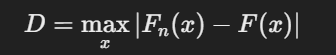

donde F(x) es la FDA teorica de la distribucion normal, calculada utilizando la media y la desviacion estandar de la muestra.

3- Hipotesis:
    - Hipotesis Nula (H0): La muestra proviene de una distribucion normal.
    - Hipotesis Alternativa (H1): La mustra no proviene de una distribucion normal.


Proceso del Test:

1- Normalizar los datos:
Antes de realizar el test, es comun normalizar los datos restando la media de la muestra y diviendo por la desviacion estandar de la muestra. Esto permite comparar la muestra con una distribucio normal estandar (media 0 y desviacion estandar 1).

2- Calcular la FDA empirica:
La FDA empirica se calcula ordenando los datos de la muestra y asignando a cada punto una probabilidad acumulativa.

3- Comparar FDA empirica con la teorica.
Se calcula la diferencia maxima entre la FDA empirica y la FDA normal teorica.

4- Evaluar la estadistica de prueba:
La significancoa de la estadistica D se evalua contra valores criticos especificos del test de Kolmogorov-Smirnov, que dependen del tamanio de la muestra. Si D es mayor que el valor critico (para un nivel de significancia dado, como 0.05), se rechaza la hipotesis nula.

Estadística KS: 0.04740332324916319
P-valor: 0.9703336134030777


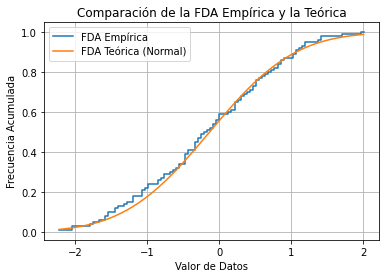

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Generar datos de ejemplo
data = np.random.normal(loc=0, scale=1, size=100)  # Datos normales como ejemplo

# Realizar el test de Kolmogorov-Smirnov para normalidad (comparar con una normal estándar)
ks_statistic, p_value = stats.kstest(data, 'norm', args=(np.mean(data), np.std(data, ddof=1)))

# Calcular la FDA empírica
ecdf = stats.cumfreq(data, numbins=100)
x = ecdf.lowerlimit + np.linspace(0, ecdf.binsize*ecdf.cumcount.size, ecdf.cumcount.size)

# FDA teórica para la normal ajustada
cdf_theoretical = stats.norm.cdf(x, np.mean(data), np.std(data, ddof=1))


print("Estadística KS:", ks_statistic)
print("P-valor:", p_value)

plt.step(x, ecdf.cumcount/ecdf.cumcount.max(), label='FDA Empírica')
plt.plot(x, cdf_theoretical, label='FDA Teórica (Normal)')
plt.title('Comparación de la FDA Empírica y la Teórica')
plt.xlabel('Valor de Datos')
plt.ylabel('Frecuencia Acumulada')
plt.legend()
plt.grid(True)
plt.show()



En este ejemplo, stats.kstest es llamado con norm para indicar la distribucion normal y args recibe la media y la desviacion estandar de la muestra para ajustar la distribucion normal estandar a los datos de la muestra. El resultado proporciona la estadistica de prueba y el p-valor, que indicar si los datos se desvain significativamente de una distribucion normal. Ademas se genera un grafico que muestra tanto la funcion de distribucion acumulativa empirica de los datos como la FDA teorica de la distribucion normal con parametros ajustados a los datos. Este grafico ayuda a visualizar las areas donde la distribucion de los datos difiere de la distribucion normal teorica.

Ejemplo: Imaginemos que tenemos datos sobre las alturas de un grupo de individuos y queremos determinar si estos datos siguen una distribucion normal. Usando el test K-S, comparariamos la CDF empirica de los datos de altura con la CDF de una distribucion normal teorica que tiene la misma media y desviacion estandar que los datos.

Pasos del Test de Kolmogorov-Smirnov

1- Calcular la CDF empirica: La CDF empirica es una funcion que muestra la proporcion de observaciones en tu muestra que son menores o iguales a cada valor posible.

2- Calcular o determinar la CDF teorica: Para una muestra, esto podria ser la CDF de una distribucion normal, exponencial, etc, dependiendo de tu hipotesis.

3- Calcular el estadistico D: Encuentra la mayor diferencia absoluta entre las dos CDFs

4- Determinar significancia: Compara el estadistico contra un valor critico obtenido de tablas K-S o calculado por software estadistico para determinar si la diferencia es estadisticamente significativa.

Interpretacion de resultados

- Rechazar la hipotesis nula: Si D es mayor que el valor critico (o si el p-valor es menor que el nivel de significancia, usualmente 0.05), hay evidencia suficiente para rechazar la hipotesis nula de que los datos siguen la distribucion teorica o de que dos muestras provienen de la misma distribucion.

- No rechazar la hipotesis nula: si D es menor que el valor critico, no hay suficiente evidencia para rechazar la hipotesis nula.

In [3]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

#Paso 1: Calcular la ECDF, asigna a cada valor la proporcion de valores en la muestra que son menores o iguales a ese valor.

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points
    n = len(data)
    # x-data for the ECDF: sorted data
    x = np.sort(data)
    # y-data for the ECDF: evenly spaced data points with maximum of 1
    y = np.arange(1, n + 1) / n
    return x, y

#Paso 2: Calcular la CDF teorica. Usarmeos la CDF de una distribucion normal utilziando la media y desviacion estandar de los datos.

def theoretical_cdf(data, x_values):
    mean = np.mean(data)
    std = np.std(data)
    return stats.norm.cdf(x_values, mean, std)

#Paso 3: Calcular el estadistico D

def calculate_ks_statistic(data):
    # Obtener la ECDF
    x, y_ecdf = ecdf(data)
    # Obtener la CDF teórica en los mismos puntos x
    y_cdf = theoretical_cdf(data, x)
    # Calcular D
    D = np.max(np.abs(y_ecdf - y_cdf))
    return D


# Datos de ejemplo
np.random.seed(0)
sample_data = np.random.normal(loc=170, scale=10, size=100)

# Calcular el estadístico D
D = calculate_ks_statistic(sample_data)
print("Estadístico D:", D)

Estadístico D: 0.06359167772787178


Estadístico de KS: 0.014127241699475546
Valor crítico para alpha de 0.05: 0.04300697617828996
No rechazar la hipótesis nula: los datos siguen una distribución normal.


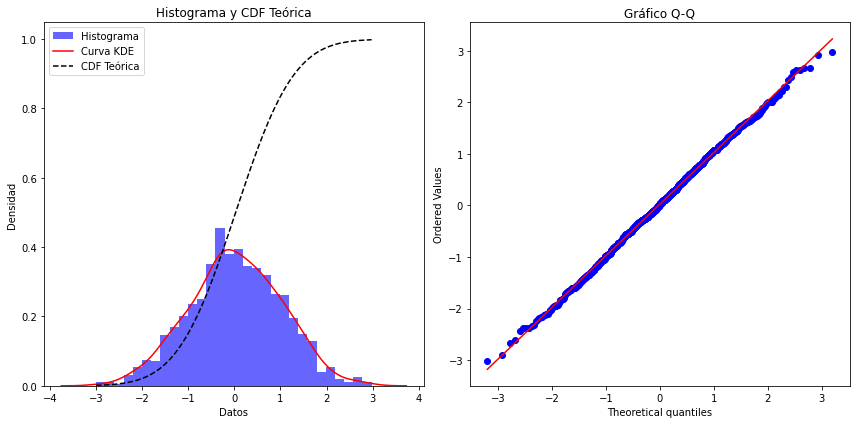

In [20]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Ordenar los datos
data = np.random.normal(0, 1, 1000)  # Aquí asumimos que tus datos son normales solo como ejemplo

# Paso 1: Ordenar los datos
sorted_data = np.sort(data)

# Paso 2: Calcular la ECDF
ecdf = np.zeros_like(sorted_data, dtype=float)
for i in range(len(sorted_data)):
    # Suma la cantidad de datos menores o iguales al dato en la posición i
    ecdf[i] = np.sum(sorted_data <= sorted_data[i]) / len(data)

# Paso 3: Calcular la CDF teórica
cdf_theoretical = [stats.norm.cdf(x, np.mean(data), np.std(data)) for x in sorted_data]

# Paso 4: Calcular las diferencias
d_plus = np.max(ecdf - cdf_theoretical)
d_minus = np.max(cdf_theoretical - np.append(0, ecdf[:-1]))

# Paso 5: Encontrar el máximo de las diferencias
ks_statistic = max(d_plus, d_minus)

# Paso 6: Comparar con el valor crítico
# Supongamos que usamos un nivel de significancia del 5%
n = len(data)
alpha = 0.05
ks_critical_value = 1.36 / np.sqrt(n)

print(f"Estadístico de KS: {ks_statistic}")
print(f"Valor crítico para alpha de {alpha}: {ks_critical_value}")

if ks_statistic > ks_critical_value:
    print('Rechazar la hipótesis nula: los datos no siguen una distribución normal.')
else:
    print('No rechazar la hipótesis nula: los datos siguen una distribución normal.')

# Histograma con curva de ajuste
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(data, bins=30, density=True, alpha=0.6, color='blue', label='Histograma')
sns.kdeplot(data, color='red', label='Curva KDE')
plt.plot(sorted_data, cdf_theoretical, color='black', linestyle='--', label='CDF Teórica')
plt.title('Histograma y CDF Teórica')
plt.xlabel('Datos')
plt.ylabel('Densidad')
plt.legend()

# Gráfico Q-Q
plt.subplot(1, 2, 2)
stats.probplot(data, dist="norm", plot=plt)
plt.title('Gráfico Q-Q')

plt.tight_layout()
plt.show()
